In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cse493g1/assignments/assignment0/'
FOLDERNAME = 'CSE493G/assignment0/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))



Mounted at /content/drive


# Intro to Course Assignments

*Welcome to Deep Learning! In this course we will use Colabs to walk you through the concepts we learn in class. Assignment will be posted on the [assignments page](https://courses.cs.washington.edu/courses/cse493g1/24wi/assignments/) on the course website.*

Assignment 0 consist of 1 colab notebook, but future assignments will consist of approximatly 3 Colab notebooks. At the beginning of each notebook we will tell you what you will be implementing in that notebook. This notebook allows you to test your knowledge of:

- Python
- Working with Matricies
- Taking derivatives

These skills may be useful to be successful in this course. This assignment will not be graded, but may be helpful for you to assess if you have the right pre-requisites for this class.

**Before you proceed please make sure you have watched the video on Colabs under Assignment 0 on the [assignments page](https://courses.cs.washington.edu/courses/cse493g1/24wi/assignments/)**

# What is in the Assignments?

You will intereact with notebooks in several ways. There will be:
- Code written by us, which you have to run as set up
- Code which you must write within the notebook
- Code which you must write within a .py file that is imported into the notebook
- In-line questions that you answer with text, not code



# Why We Use Google Colab in Our Deep Learning Course

While traditional Python environments are powerful, Google Colab offers unique advantages that make it particularly suitable for deep learning applications:

1. **Simplified Library Management:**
   - Colab has pre-installed many popular deep learning libraries, such as TensorFlow, PyTorch, and Keras. This saves you the hassle of setting up and maintaining these libraries locally. It ensures that everyone in the class is working with the same versions, avoiding the "it works on my machine" problem.

2. **Persistence of Local Variables:**
   - In Colab, once you execute a cell, the variables and their states are saved for the duration of your session. This means that for time-consuming tasks like loading large datasets or training complex models, you don't have to repeat these steps every time you run your code. This persistent state can be a significant time-saver and allows for more efficient experimentation and iteration.

3. **Access to High-Performance Computing Resources:**
   - Deep learning often requires substantial computational power, typically provided by GPUs (Graphics Processing Units) and TPUs (Tensor Processing Units). Colab seamlessly integrates with these resources, providing access to high-performance hardware that would be costly and complex to set up locally. This access is critical for training more sophisticated models or working with large datasets. This will be very helpful later in the course.

# Python

Lets get started! This sections will let you get used to completing assignments in colabs and also let you evaluate your own Python background, which will be necessary throughout the course

In [2]:
# Hello! I am a code block written by course staff. Do not edit me, just run me.
import numpy as np
import os

%load_ext autoreload
%autoreload 2

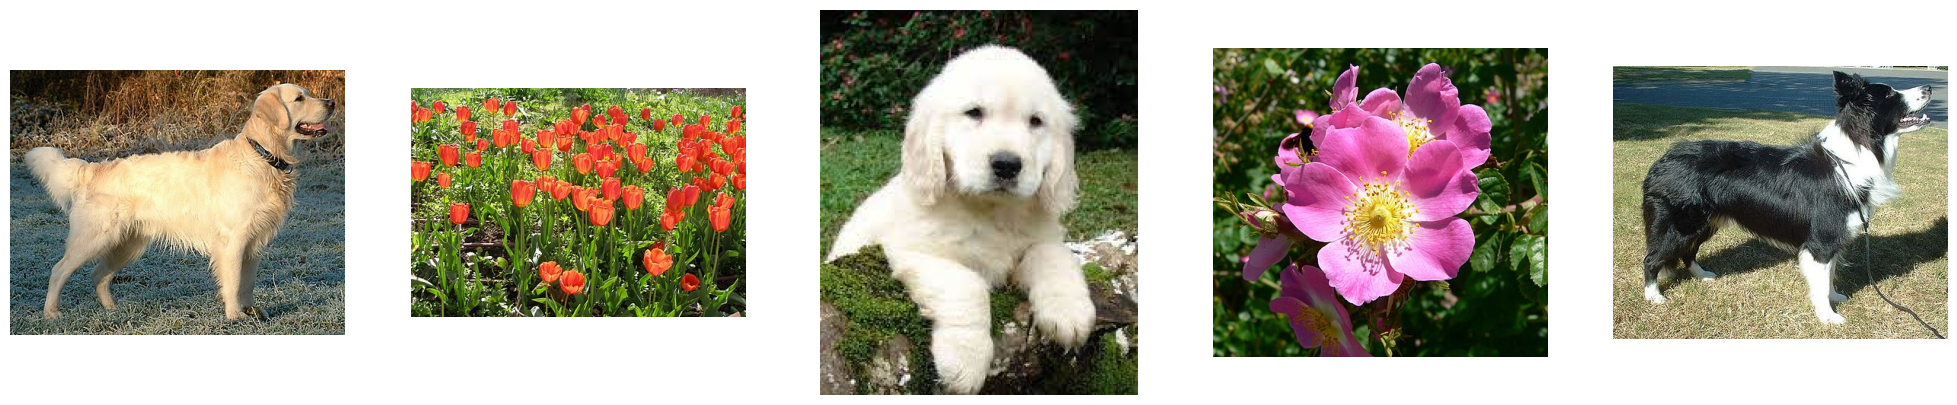

In [3]:
# I am also code block written by course staff. Do not edit me, just run me.

from python_files.select_images import ImageFolder

folder_path = '/content/drive/My Drive/{}/python_files/images'.format(FOLDERNAME)
images = ImageFolder(folder_path)
images.display_all_images_random_order()


Edit the below code so that you create a list of indices of the images with the 'dog' label

In [4]:
image_labels = images.get_image_labels()
indicies_with_dogs = []

################################################################################
# TODO:
# Populate the list 'indicies_with_dogs' with the indices of images that       #
# contain dogs. 'image_labels' contains a list of the image labels,            #
# corresponding with the order of the images. So if index 1 in 'image_labels'  #
# is 'dog' then that means that you should include 1 in your list              #
# 'indicies_with_dogs'                                                         #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for i in range (0, len(image_labels)):
  if image_labels[i] == 'dog':
    indicies_with_dogs.append(i)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


Edit the function `display_select_images` in `python_files/select_images.py` so that it displays all images of dogs and no images of flowers

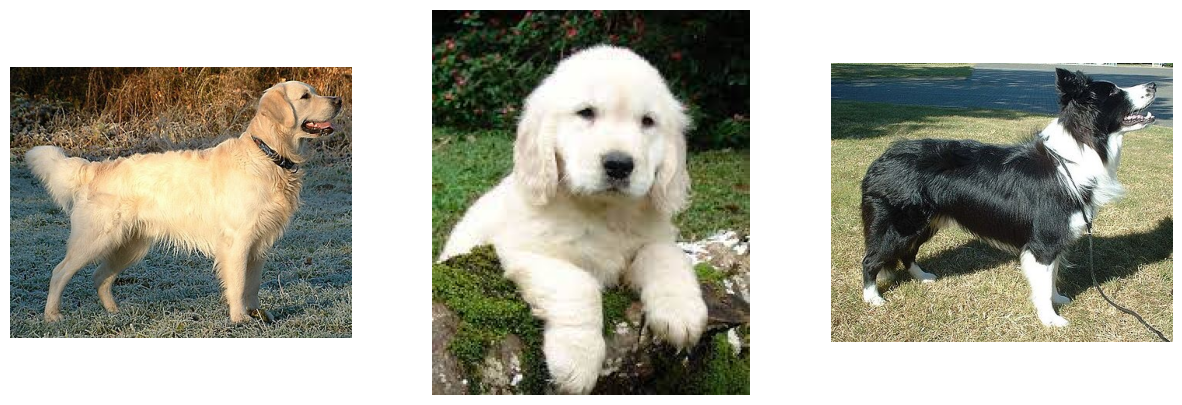

In [5]:
# do not edit this code, but instead edit the 'display_select_images' function so that running this code
# displays all the dog pictures and none of the flower pictures

images.display_select_images(indicies_with_dogs)

# Matrices

**Inline Question 1**

Consider the below matricies. What is A x B? Please compute the output matrix by hand to practice doing matrix multiplications. Don't use a computer. Write out the result below.

\
\begin{align*}
A &= \begin{bmatrix}
1 & 2 & 4 \\
2 & 3 & 1 \\
0 & 1 & 2 \\
\end{bmatrix}
\\ \\
B &= \begin{bmatrix}
0 & 1 & 3 \\
2 & 0 & 4 \\
4 & 3 & 1 \\
\end{bmatrix}
\\ \\
\end{align*}


$\color{blue}{\textit Your Answer:}$

\
\begin{align*}
\begin{bmatrix}
20 & 13 & 15 \\
10 & 5 & 19 \\
10 & 6 & 6 \\
\end{bmatrix}
\\ \\
\end{align*}



Now calculate A x B using python, by completing the function `calculate_matrix_C` in the file `python_files/matrix.py`

Hints:
1. `np.array([[0,0],[0,0]])` creates a 2x2 numpy array of zeros.
2. In numpy, `@` is the symbol for matrix multiplication

Check to make sure that your python calcuated answer is the same as your hand calculated answer.


In [6]:
# Do not modify this code, but instead complete the function `calculate_matrix_C`
from python_files.matrix import calculate_matrix_C
C = calculate_matrix_C()
print(C)


[[20 13 15]
 [10  5 19]
 [10  6  6]]


Below is your grocery list for the next 4 weeks and the cost at 2 different stores. Set up a matrix multiplication problem AB = C so that index i,j in matrix C is the cost of your groceries for week i at store j.

Grocery List Week 1:
3 apples, 2 bananas, 1 orange

Grocery List Week 2:
0 apples, 2 bananas, 2 orange

Grocery List Week 3:
5 apples, 0 bananas, 0 orange

Grocery List Week 4:
1 apples, 4 bananas, 3 orange

----------------------------------------------------------

Store 1 Prices:
apples: $\$4$, bananas: $\$2$, oranges: $\$0.5$,

Store 2 Prices:
apples: $\$2$, bananas: $\$3$, oranges: $\$1$,


In [7]:
# fill in A and B so that AB = C, where index i,j in matrix C is the cost of your groceries for week i at store j
A = np.array([[3, 2, 1], [0, 2, 2], [5, 0, 0], [1, 4, 3]])
B = np.array([[4, 2], [2, 3], [0.5, 1]])


# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

C = A @ B
print(C)

[[16.5 13. ]
 [ 5.   8. ]
 [20.  10. ]
 [13.5 17. ]]


**Inline Question 2**

Are the matrices A and B from the above question the only matrices that multiply together to equal C? If yes, provide a proof. If no, provide 2 other matrices D and E such that $DE = AB = C$


$\color{blue}{\textit Your Answer:}$ *No. For exmaple:* \\
\begin{align*}
D &= \begin{bmatrix}
16.5 & 13 \\
5 & 8 \\
20 & 10 \\
13.5 & 17 \\
\end{bmatrix}
\\ \\
E &= \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
\end{align*}




# Calculus

**Inline Question 3**

Take the derivative of the below function with respect to x.

\
\begin{align*}
f(x) = 2x^4+3x−4
\end{align*}

$\color{blue}{\textit Your Answer:}$
\begin{align*}
f'(x) = 8x^3+3
\end{align*}


**Inline Question 4**

Take the derivative of the below function with respect to x. (Hint: use the chain rule!)

\
\begin{align*}
g(x) = (3x^2−4)^5
\end{align*}

$\color{blue}{\textit Your Answer:}$
\
\begin{align*}
g'(x) = 30x(3x^2-4)^4
\end{align*}




Complete the function `value_and_derivative_of_g` in the file `python_files/derivative.py` so that it returns the value and derivative of the function g from in-line question 4 calculated at point x.

In [8]:
# Do not modify this code, but instead complete the function `calculate_matrix_C`
from python_files.derivative import value_and_derivative_of_g
value, derivative = value_and_derivative_of_g(2)
print(value, derivative)

32768 245760
